In [26]:
import pylabnet.hardware.ni_daqs.nidaqmx_card as nidaqmx
import pylabnet.hardware.staticline.staticline as staticline
import pylabnet.network.client_server.nidaqmx_card as nidaqmx_card_server
import pylabnet.network.client_server.staticline as staticline_server



%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import time

# Instantiate and Connect Client

In [27]:
daq_client = nidaqmx_card_server.Client(
    host='localhost', 
    port=17972
)

In [28]:
# Connect Client
daq_client.connect()

0

# Test Daq


In [29]:
output_channel ='ao2'
voltage_set= 1

In [30]:
daq_client.set_ao_voltage(output_channel, voltage_set)

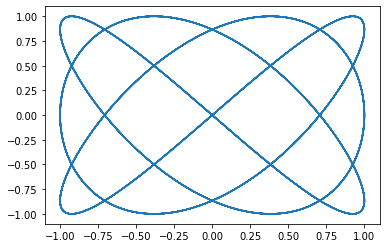

In [7]:
# Now let's try to output something cool, how about the following Lissajou figure?
a =3 
b = 4 
delta = np.pi/2
num_samples = 1650 # Should be multiples of 16
t = np.linspace(-5 * np.pi, 5 * np.pi, num_samples)


x = np.sin(a * t + delta)
y = np.sin(b * t)
plt.plot(x, y)

plt.show()


In [ ]:
# Plug in ao0 in Channel 1 of scope, ao1 in Channel 2, choose infinite persistence 
for x_val, y_val in zip(x, y):
    daq_client.set_ao_voltage('ao0', x_val)
    daq_client.set_ao_voltage('ao1', y_val)


# Test Staticline

In [32]:
staticline_client = staticline_server.Client(
    host='localhost', 
    port=12986
)

In [33]:
staticline_client.connect()

0

In [36]:
staticline_client.up()

In [35]:
staticline_client.down()